<a href="https://colab.research.google.com/github/glitch-rgti/rgti/blob/master/GL_CNN_Vision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import necessary modules.

import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.models import Sequential        
from tensorflow.keras.layers import Conv2D              
from tensorflow.keras.layers import MaxPooling2D        
from tensorflow.keras.layers import Flatten             
from tensorflow.keras.layers import Dense, Dropout      

In [4]:
df = np.load('/content/drive/MyDrive/cnn/images.npy')

Loading image file from drive

In [5]:
df.shape

(4750, 128, 128, 3)

It has 4750 images with 128*128 pixels and they are color images

In [6]:
labels = pd.read_csv('/content/drive/MyDrive/cnn/Labels.csv')

Loading labels file from the drive

In [7]:
labels.shape

(4750, 1)

4750 data

In [8]:
labels.head(10)

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


In [9]:
labels.nunique()

Label    12
dtype: int64

In [10]:
labels.Label.unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

The 12 types of plants

In [11]:
labels['Label'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

No. of data for each type of plant, Loose Silky bent has the most numbers and Maize has the least

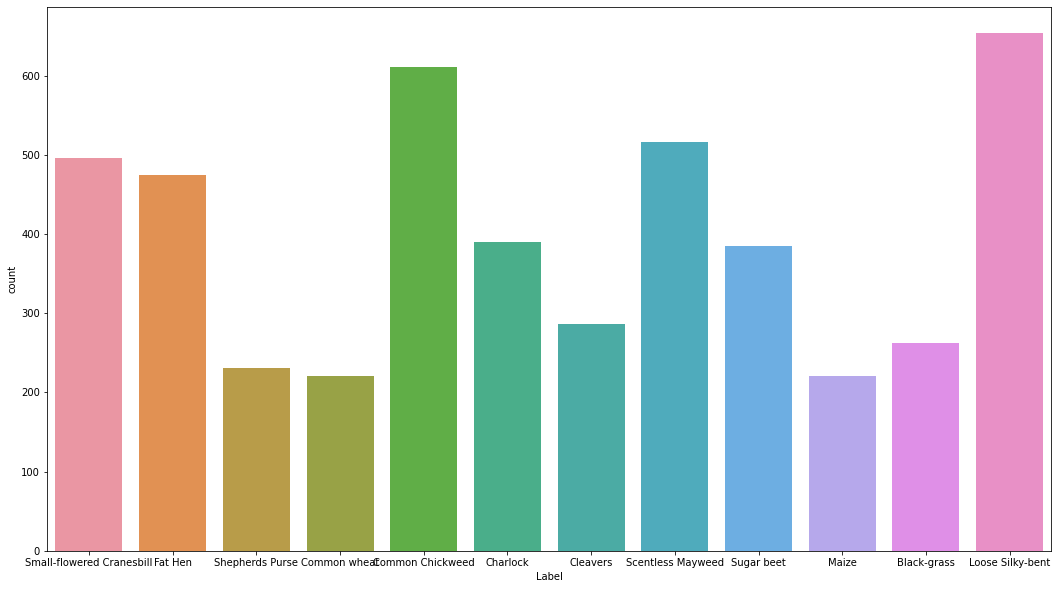

In [12]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.countplot(x='Label',data=labels)

Visual representation of distribution of the data

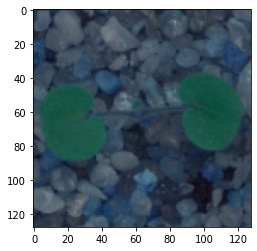

In [13]:
i = 0
image = df[i]
plt.imshow(image);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


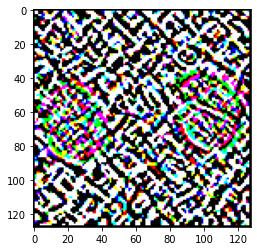

In [14]:
sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)

Applying sobel filter, though it's quality is not good, the presence of leaf edges can be observed.

In [15]:
print('Image Matrix: \n', df)
print(type(df))

Image Matrix: 
 [[[[ 35  52  78]
   [ 36  49  76]
   [ 31  45  69]
   ...
   [ 78  95 114]
   [ 76  93 110]
   [ 80  95 109]]

  [[ 33  46  68]
   [ 37  50  73]
   [ 48  65  83]
   ...
   [ 81  96 113]
   [ 74  89 105]
   [ 83  95 109]]

  [[ 34  50  68]
   [ 35  52  72]
   [ 70  85 101]
   ...
   [ 83  97 112]
   [ 79  94 108]
   [ 79  94 107]]

  ...

  [[ 35  50  69]
   [ 42  57  73]
   [ 42  57  72]
   ...
   [ 60  76  92]
   [ 67  81  97]
   [ 64  77  95]]

  [[ 36  52  67]
   [ 48  63  78]
   [ 41  57  73]
   ...
   [ 44  66  83]
   [ 58  76  91]
   [ 57  74  90]]

  [[ 44  58  70]
   [ 43  57  73]
   [ 40  55  72]
   ...
   [ 41  70  92]
   [ 55  78  97]
   [ 61  79  96]]]


 [[[ 30  47  63]
   [ 30  50  60]
   [ 34  47  63]
   ...
   [ 48  59  74]
   [ 42  54  69]
   [ 44  56  70]]

  [[ 30  49  67]
   [ 26  47  60]
   [ 30  40  61]
   ...
   [ 50  64  76]
   [ 52  67  78]
   [ 45  56  72]]

  [[ 23  46  65]
   [ 27  48  64]
   [ 25  40  59]
   ...
   [ 39  59  81]
   [ 47  62 

In [16]:
df[1].shape

(128, 128, 3)

Original Image:



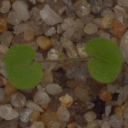


Gaussian blurring: 



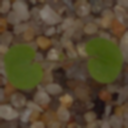

In [17]:
Gaussianblurimg = cv2.GaussianBlur(image, (5, 5), 0)
print('Original Image:\n')
cv2_imshow(image)
print('\nGaussian blurring: \n')
cv2_imshow(Gaussianblurimg)

Applying and trying out Gaussian blur on the first image

In [18]:
pp_images = []
for img in df:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    pp_images.append(blurImg)

All the images were applied with the Gaussian blur

In [19]:
pp_images[0].shape

(128, 128, 3)

Original Image:



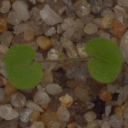


Gaussian blurring: 



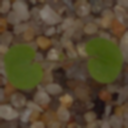

In [20]:
print('Original Image:\n')
cv2_imshow(df[0])
print('\nGaussian blurring: \n')
cv2_imshow(pp_images[0])

Original Image:



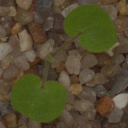


Gaussian blurring: 



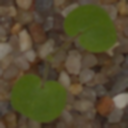

In [21]:
print('Original Image:\n')
cv2_imshow(df[100])
print('\nGaussian blurring: \n')
cv2_imshow(pp_images[100])

In [22]:
len(pp_images)

4750

In [23]:
ndf = []

for n in pp_images:
  ndf.append(n / 255)

Normalizing the pixels by dividing it with 255, since 255 is the highest pixel value possible

In [24]:
len(ndf)

4750

In [43]:
from numpy import array
dfn = array(ndf)

In [44]:
dfn.shape

(4750, 128, 128, 3)

NORMALIZED VALUES

In [45]:
labels.Label.unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [46]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

X = [['Small-flowered Cranesbill', 0], ['Fat Hen', 1], ['Shepherds Purse', 2], ['Common wheat', 3], ['Common Chickweed', 4], ['Charlock', 5],
     ['Cleavers', 6], ['Scentless Mayweed', 7], ['Sugar beet', 8], ['Maize', 9], ['Black-grass', 10], ['Loose Silky-bent', 11]]

enc.fit(X)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)

In [47]:
lab = enc.fit_transform(labels).toarray()

Appling one hot encoding using the custom dictionary

In [48]:
lab.shape

(4750, 12)

In [49]:
lab[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

Output of 1st data from the encoded array

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfn, lab, test_size=0.30, random_state=42)

Splitting the data to train and test in the ration 7:3

In [51]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

Splitting test dataset to test and validation equally.

In [68]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

3325
712
713


In [69]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 12)
(712, 12)
(713, 12)


CREATING CNN Moddel

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)       

In [55]:
from keras import optimizers
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [56]:
model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [59]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,y_val),batch_size = batch_size)

Epoch 1/50
104/104 [==============================] - 5s 51ms/step - loss: 0.6423 - accuracy: 0.7690 - val_loss: 0.6530 - val_accuracy: 0.8008
Epoch 2/50
104/104 [==============================] - 5s 47ms/step - loss: 0.6387 - accuracy: 0.7729 - val_loss: 0.7528 - val_accuracy: 0.7349
Epoch 3/50
104/104 [==============================] - 5s 48ms/step - loss: 0.6041 - accuracy: 0.7871 - val_loss: 0.6995 - val_accuracy: 0.7700
Epoch 4/50
104/104 [==============================] - 5s 48ms/step - loss: 0.6011 - accuracy: 0.7922 - val_loss: 0.6796 - val_accuracy: 0.7714
Epoch 5/50
104/104 [==============================] - 5s 48ms/step - loss: 0.5911 - accuracy: 0.7943 - val_loss: 0.7040 - val_accuracy: 0.7475
Epoch 6/50
104/104 [==============================] - 5s 48ms/step - loss: 0.6117 - accuracy: 0.7880 - val_loss: 0.6940 - val_accuracy: 0.7644
Epoch 7/50
104/104 [==============================] - 5s 49ms/step - loss: 0.5701 - accuracy: 0.7997 - val_loss: 0.6236 - val_accuracy: 0.7994

Evaluating the model

In [60]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 17ms/step - loss: 0.4261 - accuracy: 0.8483
Test loss: 0.42605480551719666
Test accuracy: 0.8483145833015442


Getting the original images from the normalized data

In [61]:
X_test = X_test*255

In [62]:
orig_labels = np.argmax(y_test, axis=1)

**Outputing the test images with the labels.**

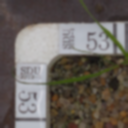

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
['Cleavers', 6]


In [63]:
cv2_imshow(X_test[2])
print(y_test[2])
print(X[orig_labels[2]])

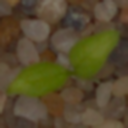

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
['Common wheat', 3]


In [64]:
cv2_imshow(X_test[3])
print(y_test[3])
print(X[orig_labels[3]])

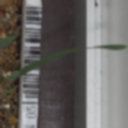

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['Common Chickweed', 4]


In [65]:
cv2_imshow(X_test[33])
print(y_test[33])
print(X[orig_labels[33]])

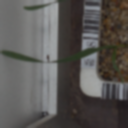

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
['Common Chickweed', 4]


In [66]:
cv2_imshow(X_test[36])
print(y_test[36])
print(X[orig_labels[36]])

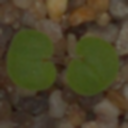

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
['Black-grass', 10]


In [67]:
cv2_imshow(X_test[59])
print(y_test[59])
print(X[orig_labels[59]])

In [72]:
from sklearn.metrics import confusion_matrix